In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "abruzzo"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,13,Abruzzo,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,13,Abruzzo,0,0,0,0,0,0,0,...,0.0,8.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,13,Abruzzo,1,0,1,0,1,1,1,...,0.0,20.0,0.0,0.0,0.00,100.00,5.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,13,Abruzzo,1,0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
4,2020-02-29T17:00:00,13,Abruzzo,2,0,2,0,2,1,1,...,0.0,10.0,0.0,0.0,0.00,100.00,10.00,0.00,0.00,100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,2020-12-04T17:00:00,13,Abruzzo,700,73,773,17019,17792,-36,408,...,15.0,4240.0,1541.0,-35.0,9.44,4.34,9.62,26.48,-3.95,-0.20
284,2020-12-05T17:00:00,13,Abruzzo,675,73,748,16499,17247,-545,376,...,14.0,5161.0,1658.0,-520.0,9.76,4.34,7.29,22.68,0.00,-3.06
285,2020-12-06T17:00:00,13,Abruzzo,667,71,738,16350,17088,-159,294,...,11.0,4701.0,1419.0,-149.0,9.62,4.32,6.25,20.72,-2.74,-0.92
286,2020-12-07T17:00:00,13,Abruzzo,678,73,751,15890,16641,-447,124,...,9.0,1636.0,442.0,-460.0,9.72,4.51,7.58,28.05,2.82,-2.62


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 8, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 2) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 312
Nuovi tamponi: 3957.0
Percentuale nuovi positivi/nuovi tamponi: 8.0 %
Nuovi guariti: 499.0
Nuovi deceduti: 5.0
Variazione positivi ricoverati con sintomi: -20.0
Variazione positivi in terapia intensiva: -4.0
Variazione positivi in isolamento dimiciliare: -168.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 8, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-09T17:00:00,13,Abruzzo,100,7,107,1142,1249,97,103,...,1.0,2787.0,1471.0,87.0,6.54,8.57,3.70,7.00,0.00,8.42
1,2020-10-10T17:00:00,13,Abruzzo,110,7,117,1224,1341,92,94,...,0.0,2388.0,1315.0,82.0,5.98,8.72,3.94,7.15,0.00,7.37
2,2020-10-11T17:00:00,13,Abruzzo,116,8,124,1293,1417,76,77,...,0.0,2278.0,1455.0,69.0,6.45,8.75,3.38,5.29,14.29,5.67
3,2020-10-12T17:00:00,13,Abruzzo,137,11,148,1384,1532,115,117,...,1.0,2227.0,1369.0,91.0,7.43,9.66,5.25,8.55,37.50,8.12
4,2020-10-13T17:00:00,13,Abruzzo,146,15,161,1518,1679,147,146,...,0.0,2877.0,1795.0,134.0,9.32,9.59,5.07,8.13,36.36,9.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-12-04T17:00:00,13,Abruzzo,700,73,773,17019,17792,-36,408,...,15.0,4240.0,1541.0,-35.0,9.44,4.34,9.62,26.48,-3.95,-0.20
57,2020-12-05T17:00:00,13,Abruzzo,675,73,748,16499,17247,-545,376,...,14.0,5161.0,1658.0,-520.0,9.76,4.34,7.29,22.68,0.00,-3.06
58,2020-12-06T17:00:00,13,Abruzzo,667,71,738,16350,17088,-159,294,...,11.0,4701.0,1419.0,-149.0,9.62,4.32,6.25,20.72,-2.74,-0.92
59,2020-12-07T17:00:00,13,Abruzzo,678,73,751,15890,16641,-447,124,...,9.0,1636.0,442.0,-460.0,9.72,4.51,7.58,28.05,2.82,-2.62


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

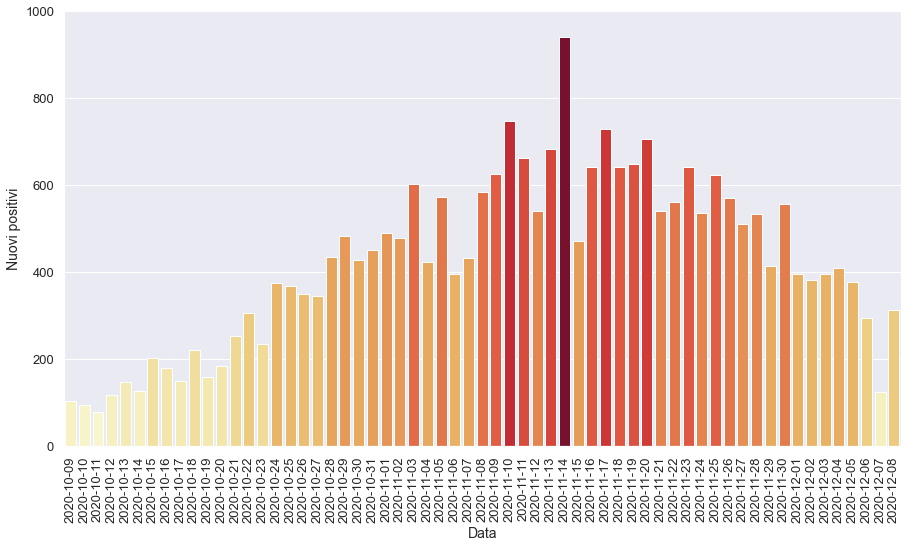

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

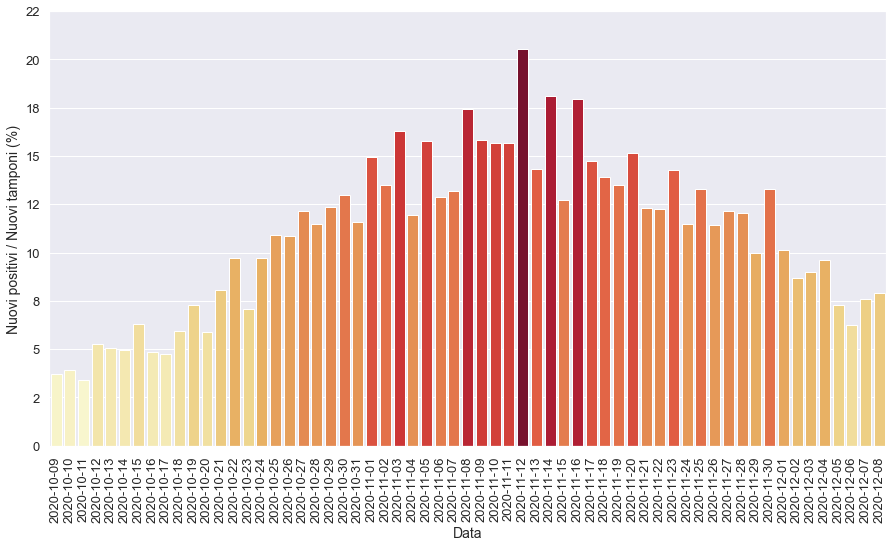

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

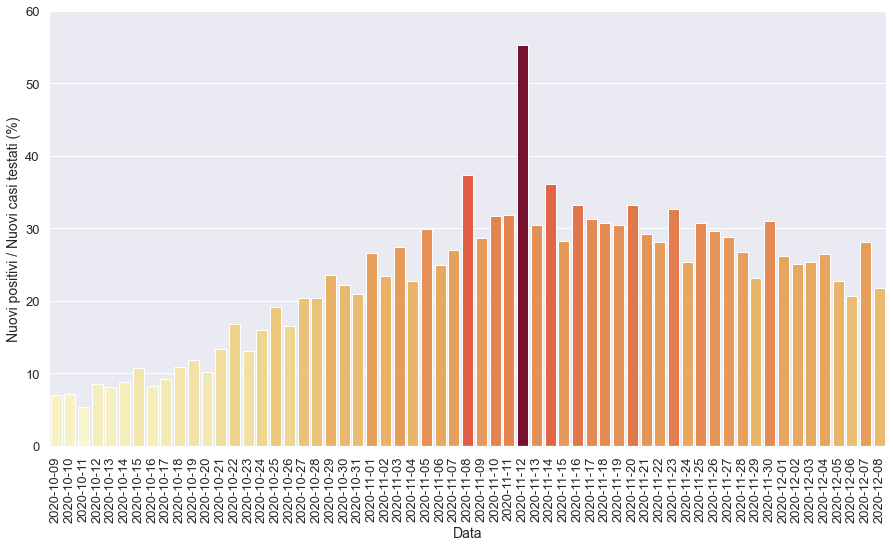

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

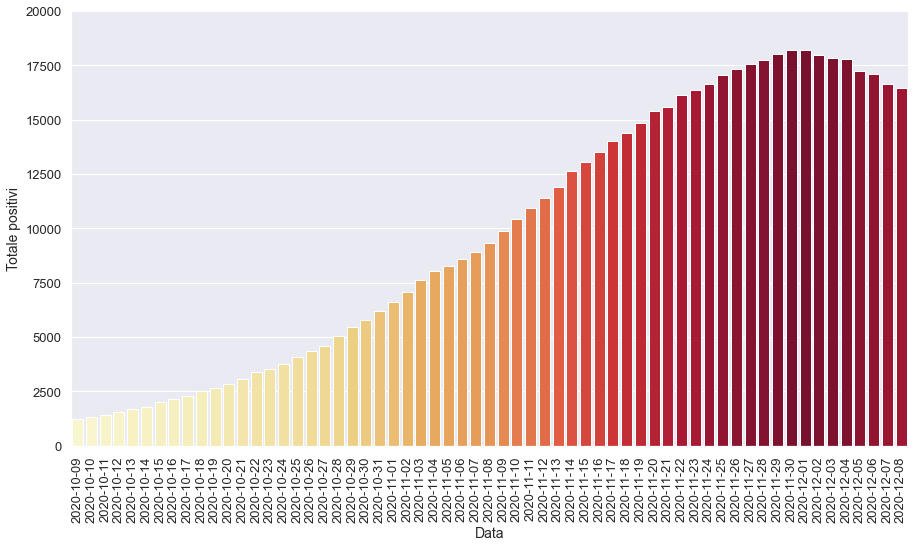

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

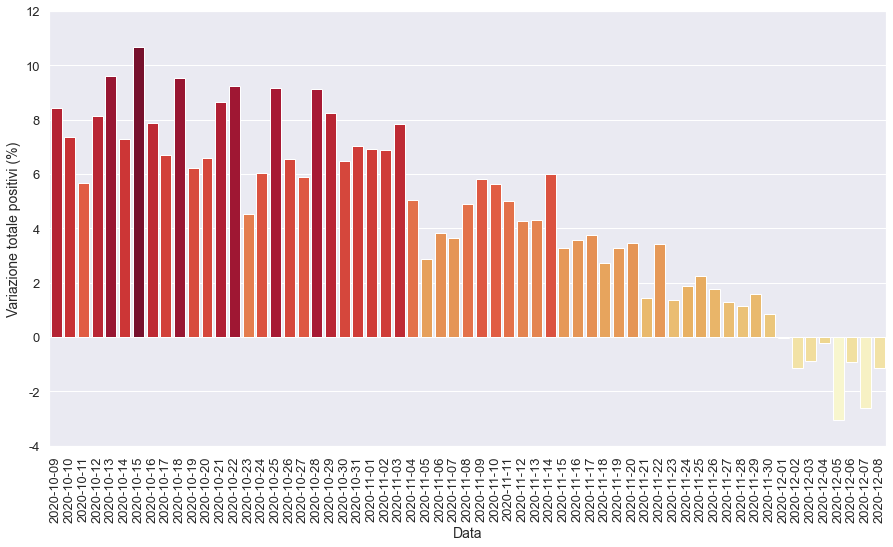

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

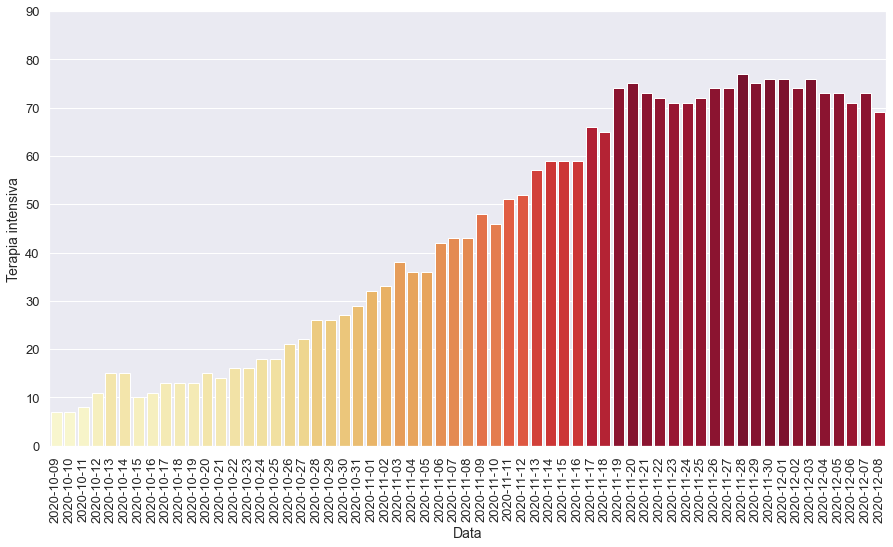

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

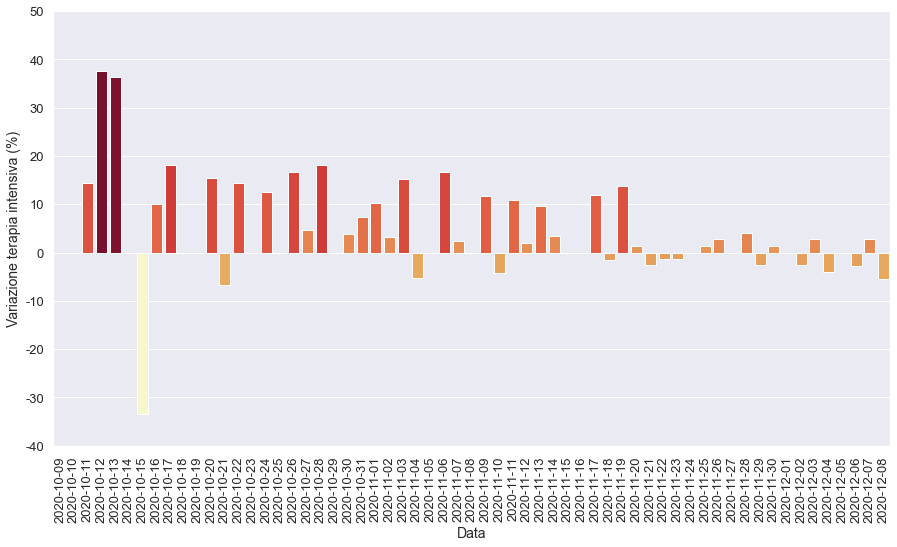

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

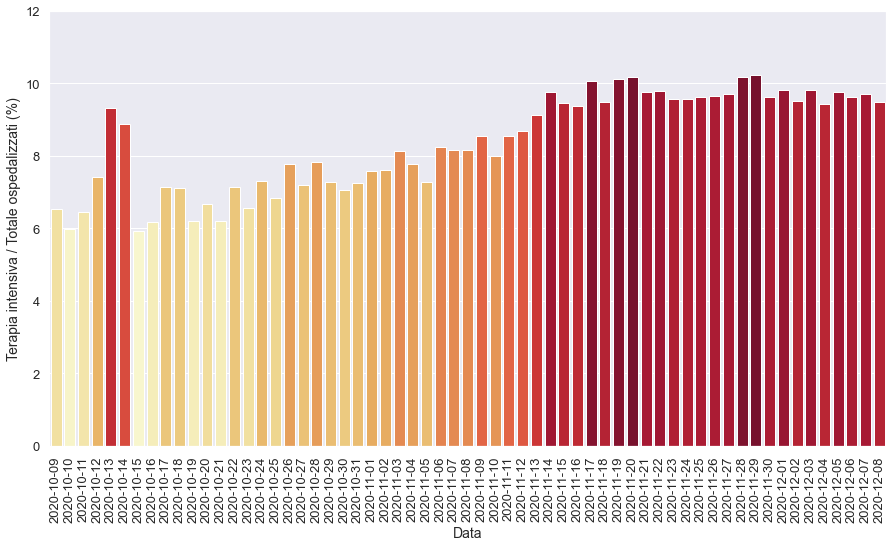

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

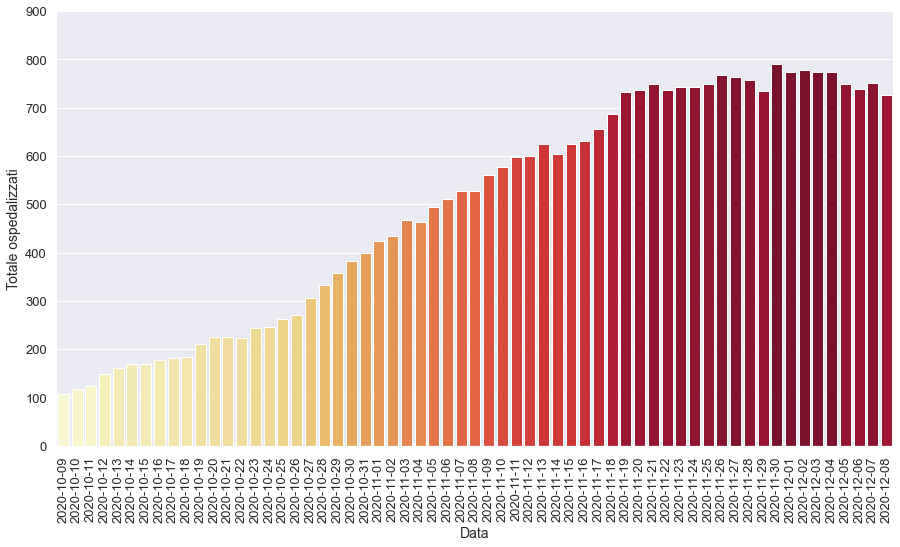

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

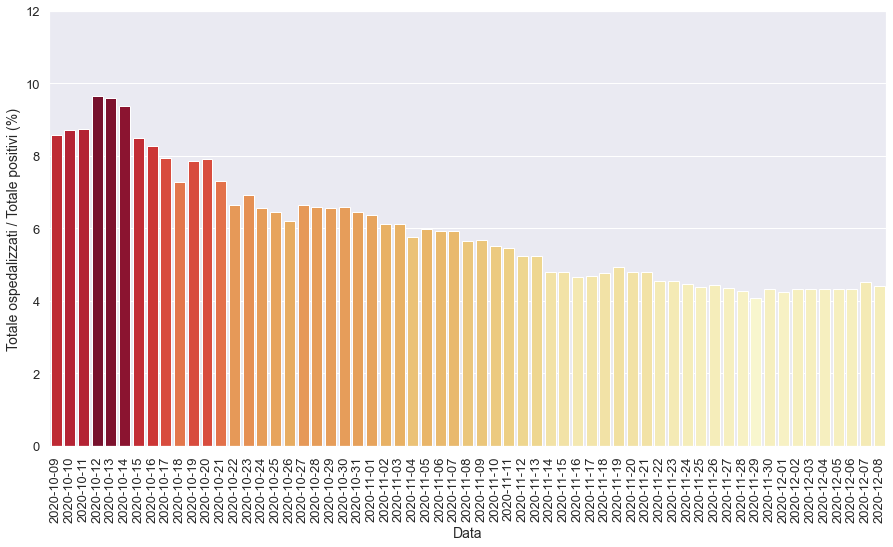

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

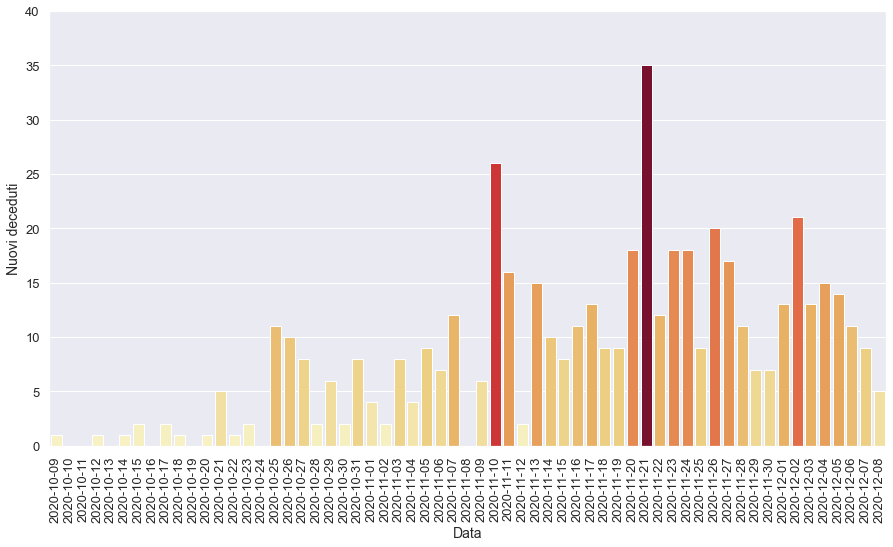

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

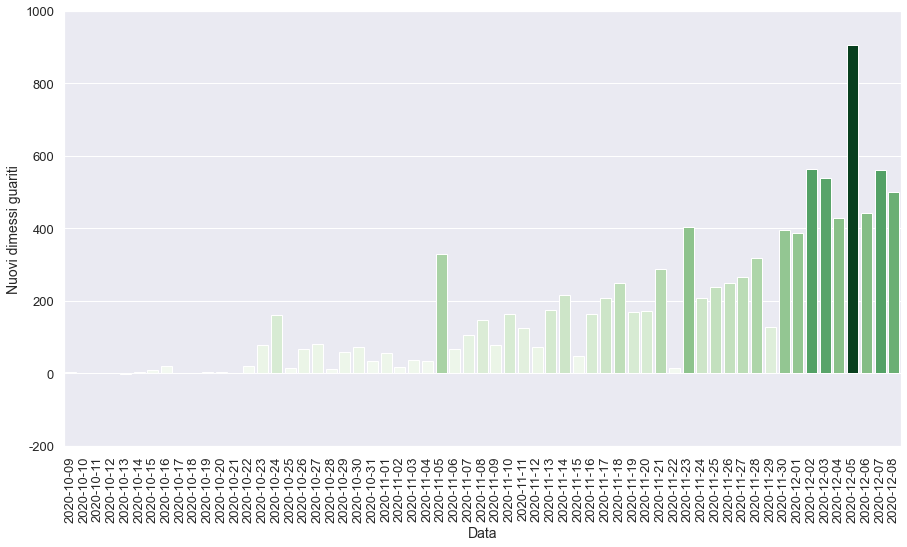

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-08T17:00:00,13,Abruzzo,484,43,527,8804,9331,436,584,...,0.0,3349.0,1565.0,436.0,8.16,5.65,17.44,37.32,0.00,4.90
1,2020-11-09T17:00:00,13,Abruzzo,513,48,561,9311,9872,541,625,...,6.0,3951.0,2177.0,507.0,8.56,5.68,15.82,28.71,11.63,5.80
2,2020-11-10T17:00:00,13,Abruzzo,530,46,576,9852,10428,556,746,...,26.0,4766.0,2352.0,541.0,7.99,5.52,15.65,31.72,-4.17,5.63
3,2020-11-11T17:00:00,13,Abruzzo,546,51,597,10353,10950,522,662,...,16.0,4223.0,2083.0,501.0,8.54,5.45,15.68,31.78,10.87,5.01
4,2020-11-12T17:00:00,13,Abruzzo,547,52,599,10817,11416,466,541,...,2.0,2636.0,979.0,464.0,8.68,5.25,20.52,55.26,1.96,4.26
5,2020-11-13T17:00:00,13,Abruzzo,567,57,624,11284,11908,492,683,...,15.0,4769.0,2244.0,467.0,9.13,5.24,14.32,30.44,9.62,4.31
6,2020-11-14T17:00:00,13,Abruzzo,545,59,604,12018,12622,714,939,...,10.0,5183.0,2604.0,734.0,9.77,4.79,18.12,36.06,3.51,6.00
7,2020-11-15T17:00:00,13,Abruzzo,565,59,624,12410,13034,412,470,...,8.0,3697.0,1665.0,392.0,9.46,4.79,12.71,28.23,0.00,3.26
8,2020-11-16T17:00:00,13,Abruzzo,571,59,630,12869,13499,465,642,...,11.0,3576.0,1930.0,459.0,9.37,4.67,17.95,33.26,0.00,3.57
9,2020-11-17T17:00:00,13,Abruzzo,590,66,656,13352,14008,509,729,...,13.0,4953.0,2326.0,483.0,10.06,4.68,14.72,31.34,11.86,3.77


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

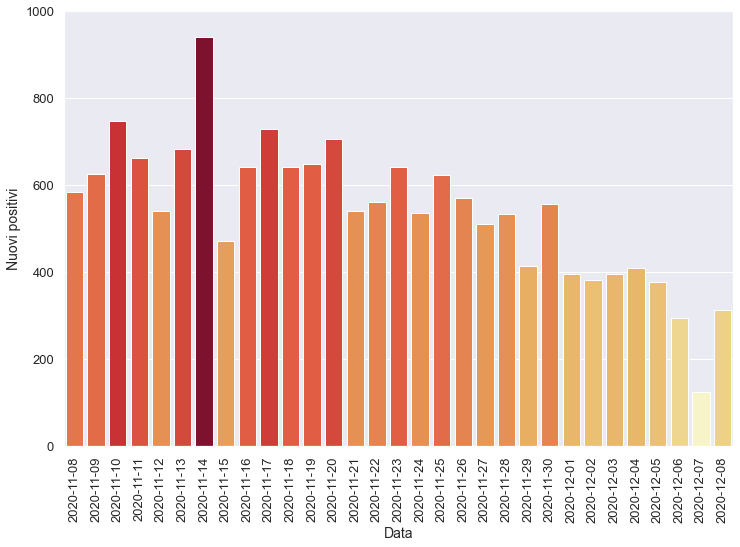

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

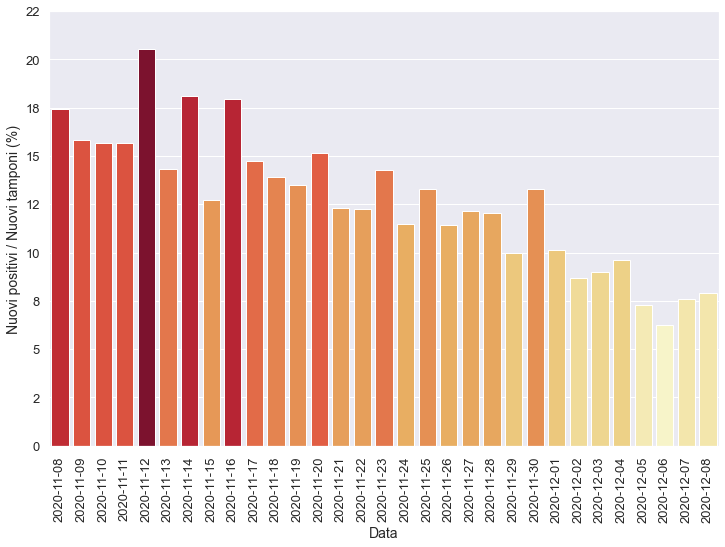

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

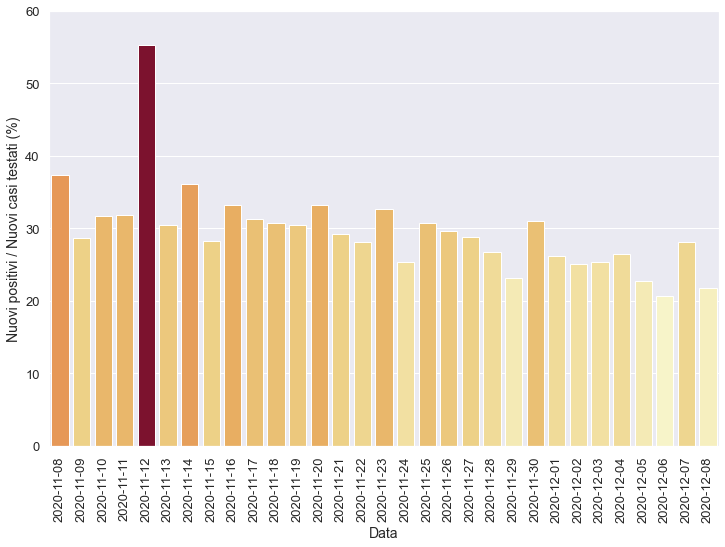

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

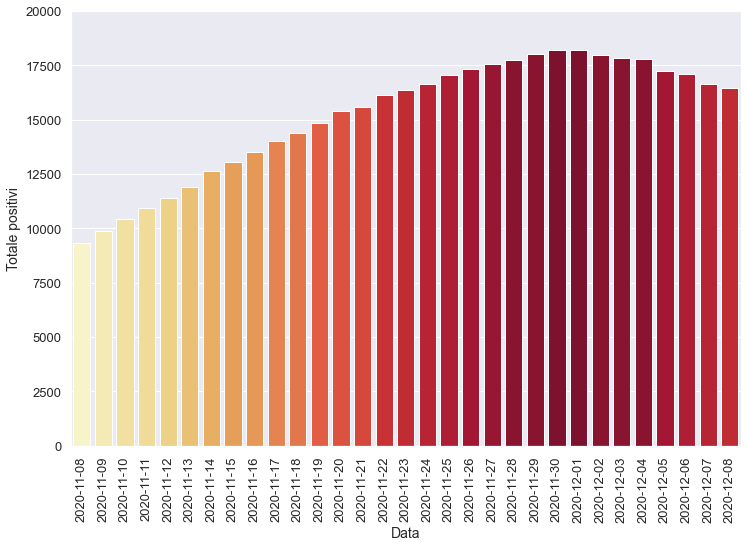

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

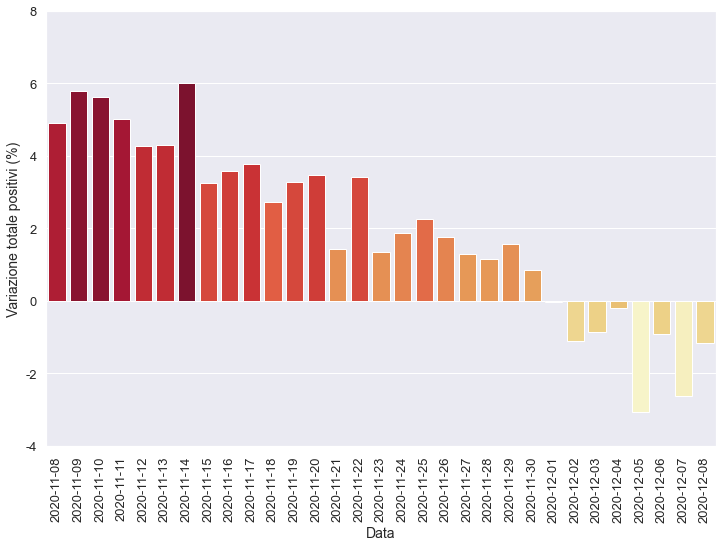

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

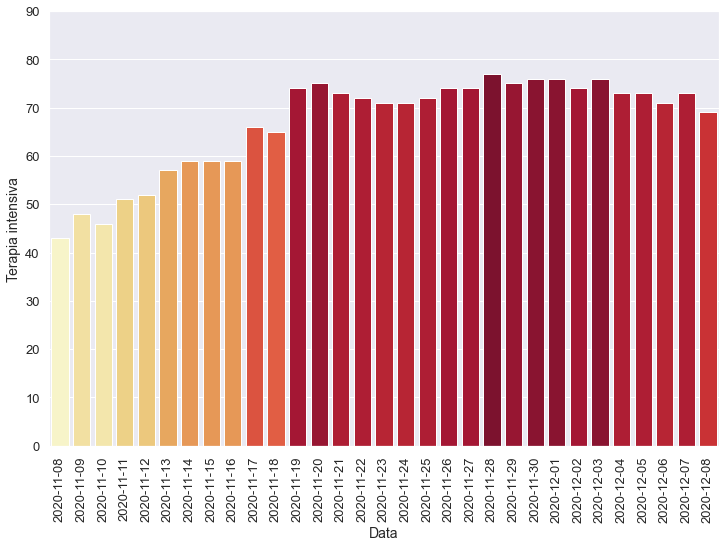

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

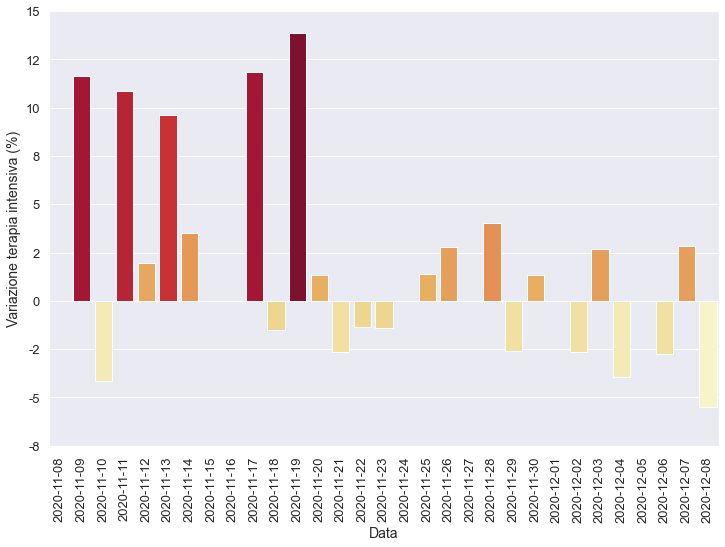

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

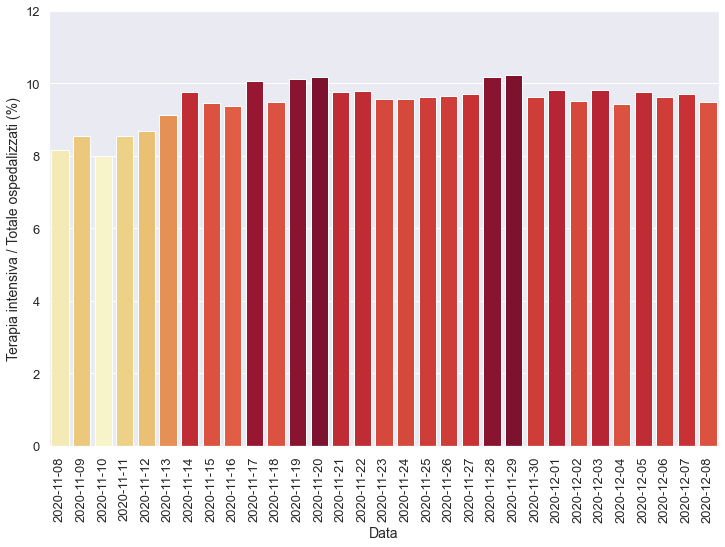

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

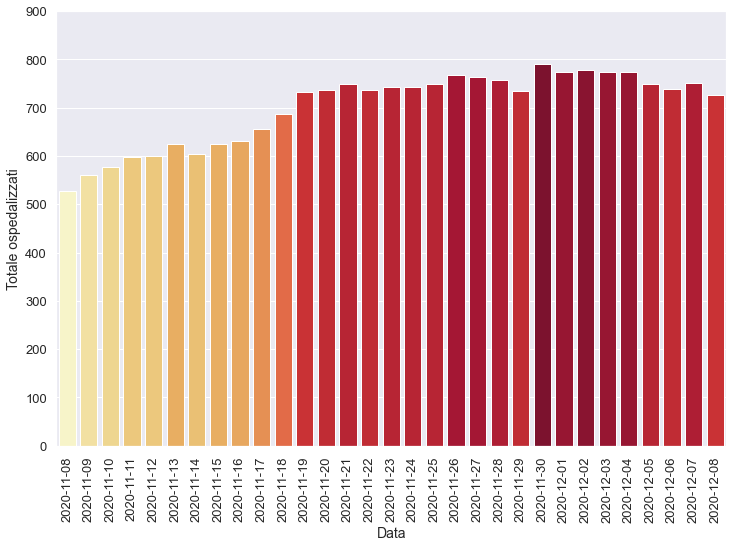

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

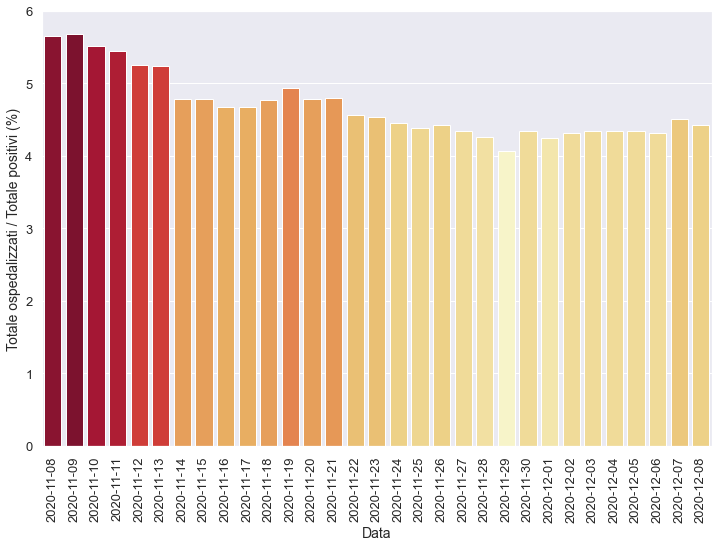

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

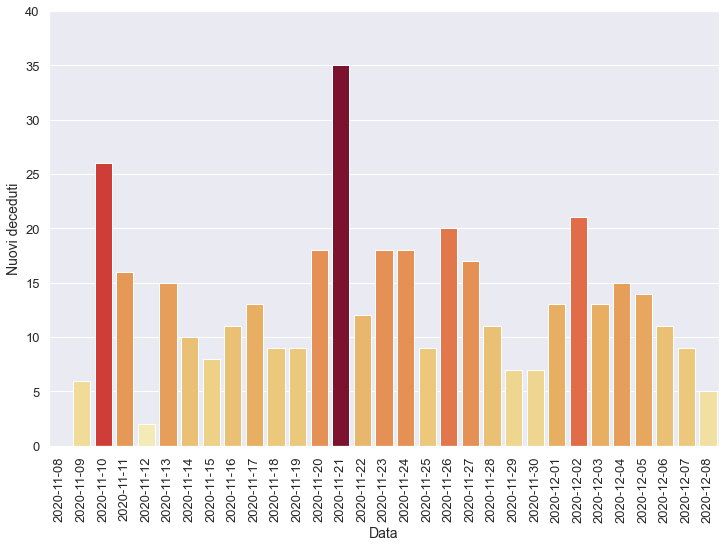

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

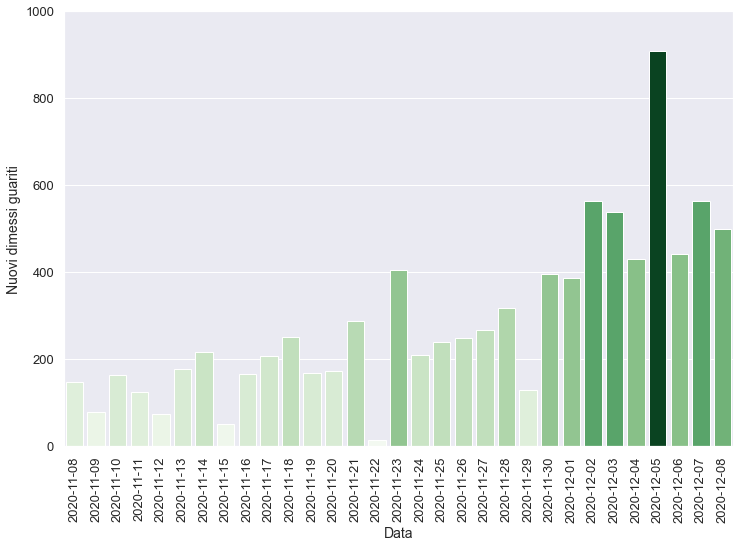

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-01T17:00:00,13,Abruzzo,697,76,773,17415,18188,-4,396,...,13.0,3901.0,1515.0,13.0,9.83,4.25,10.15,26.14,0.00,-0.02
1,2020-12-02T17:00:00,13,Abruzzo,703,74,777,17207,17984,-204,381,...,21.0,4384.0,1523.0,-208.0,9.52,4.32,8.69,25.02,-2.63,-1.12
2,2020-12-03T17:00:00,13,Abruzzo,698,76,774,17054,17828,-156,395,...,13.0,4400.0,1556.0,-153.0,9.82,4.34,8.98,25.39,2.70,-0.87
3,2020-12-04T17:00:00,13,Abruzzo,700,73,773,17019,17792,-36,408,...,15.0,4240.0,1541.0,-35.0,9.44,4.34,9.62,26.48,-3.95,-0.20
4,2020-12-05T17:00:00,13,Abruzzo,675,73,748,16499,17247,-545,376,...,14.0,5161.0,1658.0,-520.0,9.76,4.34,7.29,22.68,0.00,-3.06
5,2020-12-06T17:00:00,13,Abruzzo,667,71,738,16350,17088,-159,294,...,11.0,4701.0,1419.0,-149.0,9.62,4.32,6.25,20.72,-2.74,-0.92
6,2020-12-07T17:00:00,13,Abruzzo,678,73,751,15890,16641,-447,124,...,9.0,1636.0,442.0,-460.0,9.72,4.51,7.58,28.05,2.82,-2.62
7,2020-12-08T17:00:00,13,Abruzzo,658,69,727,15722,16449,-192,312,...,5.0,3957.0,1429.0,-168.0,9.49,4.42,7.88,21.83,-5.48,-1.15


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

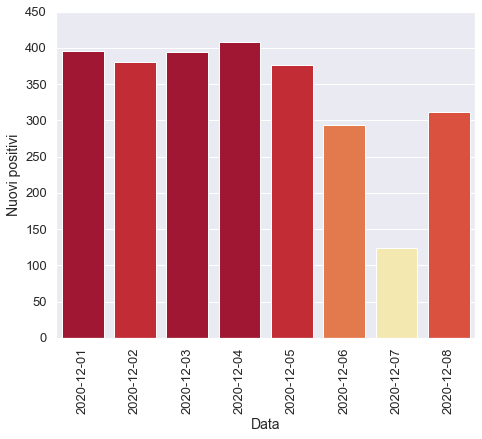

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

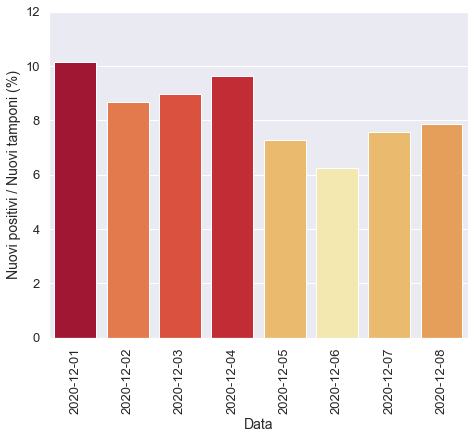

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

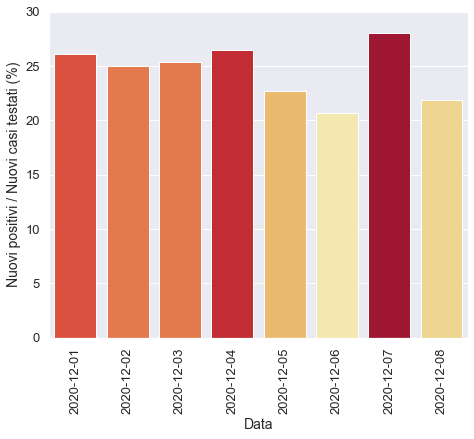

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

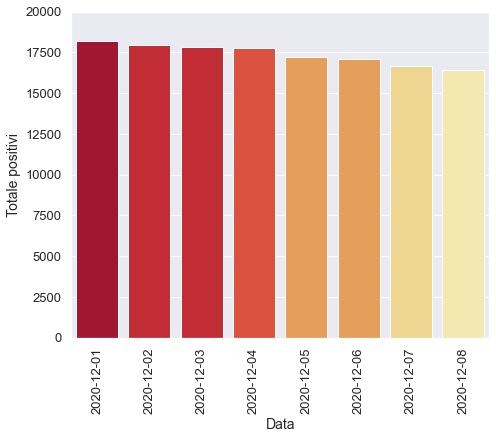

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

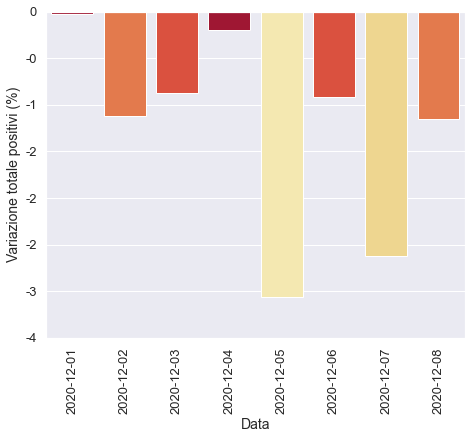

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

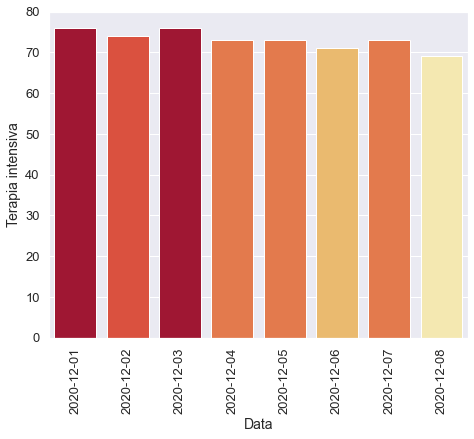

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

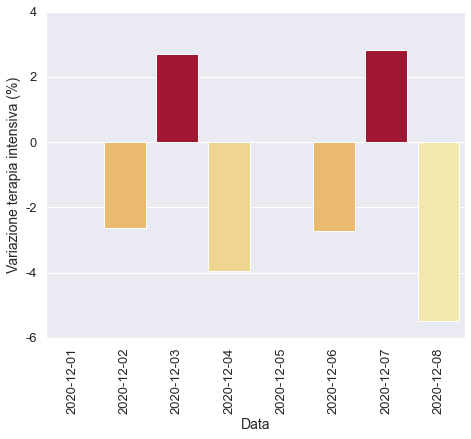

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

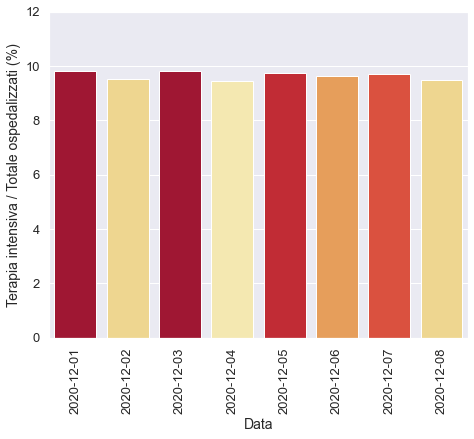

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

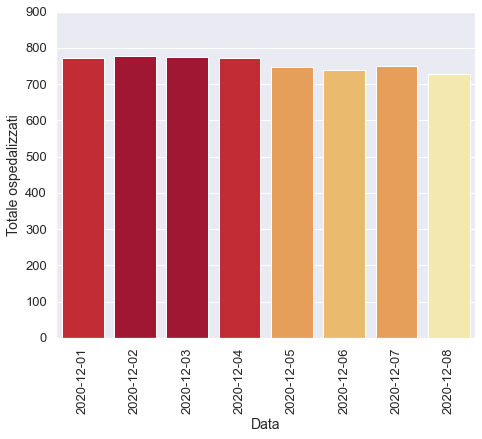

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

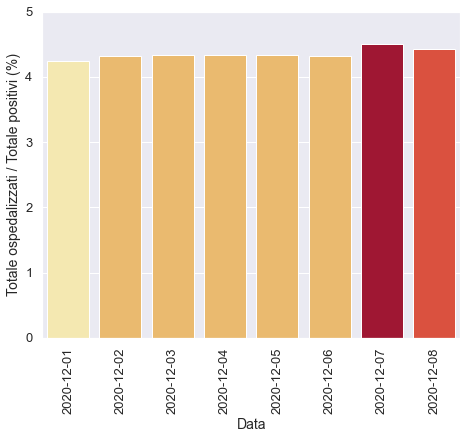

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

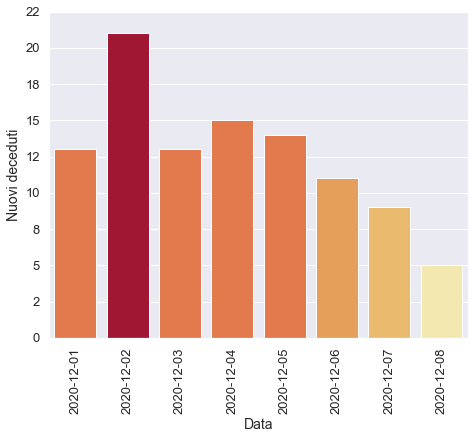

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

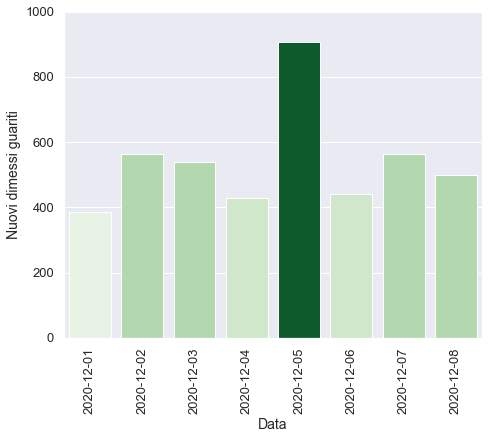

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)